# Create Intermediate Raster Result

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

import geoengine as ge
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [2]:
client = ge.create_client("http://localhost:3030/api")

In [3]:
client.get_session()

Server:              http://localhost:3030/api
User Id:             ecfd2251-fbba-4243-b6b1-44c5f5c57205
Session Id:          fac11d87-38d7-4fbb-b247-9478efcf655b
Session valid until: 2023-12-01T14:01:14.344Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = client.workflow_register(
    {
        "type": "Raster",
        "operator": {
            "type": "GdalSource",
            "params": {
                "data": "ndvi"
            },
        },
    }
)
workflow

0abf52bc-e7da-557b-be43-59b96b591f4a

In [5]:
# this method is only used to display the results a bit more concise.
def plot_geoengine_img(colorizer: list):
    time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

    # create horizontal subplots
    fig, axs = plt.subplots(1, len(colorizer), figsize=(10, 5))

    imgs = []
    for col in colorizer:
        img = client.workflow_wms_as_image(
            workflow,
            ge.QueryRectangle(
                ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
                ge.TimeInterval(time, time),
                resolution=ge.SpatialResolution(1.8, 1.8),
            ),
            col,
        )

        imgs.append(img)

    for (ax, img) in zip(axs, imgs):
        ax.imshow(img)

## General Creation of a Colorizer Instance with Default Values

In [6]:
# note: you have to specify a min/max range for your colormap calls
# and the name of the colormap
co = Colorizer.linear_with_mpl_cmap(color_map="viridis", min_max=(0, 255))

## Using Default Colormaps

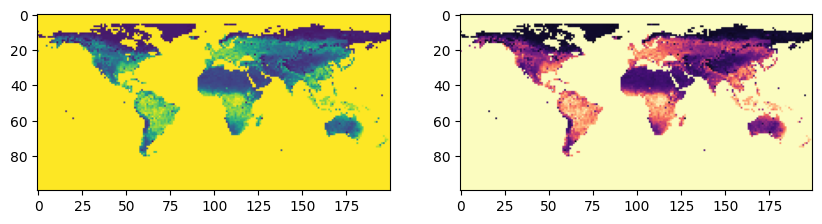

In [7]:
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="viridis", min_max=(0, 255)),
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255)),
]
plot_geoengine_img(colors)

## Configuring the Number of Steps

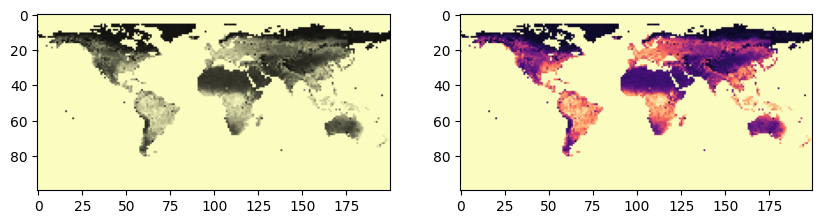

In [8]:
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255), n_steps=2),
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255), n_steps=20),
]
plot_geoengine_img(colors)

## Configuring the Value Range

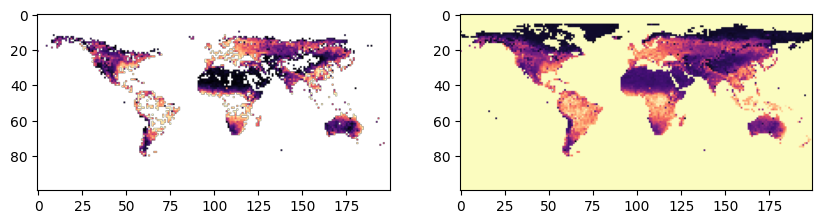

In [9]:
# note: 1st map shows, that the defaults set earlier are overriden (for that map)
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(50, 200)),
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255)),
]
plot_geoengine_img(colors)

## Using Custom Maps

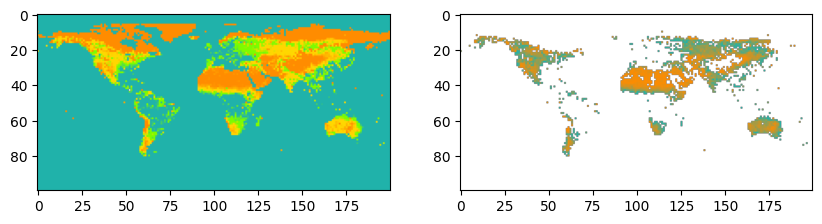

In [10]:
custom_map = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
colors = [
    Colorizer.linear_with_mpl_cmap(color_map=custom_map, min_max=(0, 255)),  # default
    Colorizer.linear_with_mpl_cmap(
        color_map=custom_map, n_steps=2, min_max=(50, 150)
    ),  # with options
]
plot_geoengine_img(colors)

## Using over/under colors

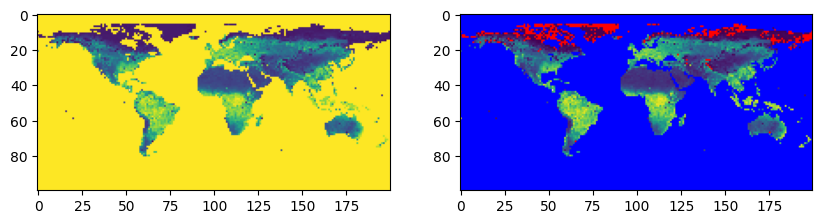

In [11]:
# we need to cut off the extreme values in order to show the over/under colors
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="viridis", min_max=(0, 255)),
    Colorizer.linear_with_mpl_cmap(
        color_map="viridis",
        min_max=(20, 254),
        over_color=(0, 0, 255, 255),
        under_color=(255, 0, 0, 255),
    ),
]
plot_geoengine_img(colors)

# Using the Palette Colorizer
We need a different dataset, so let's define a new workflow.

In [12]:
workflow = client.workflow_register(
    {
        "type": "Raster",
        "operator": {
            "type": "GdalSource",
            "params": {
                "data": "land_cover"
            },
        },
    }
)
workflow

060926cb-2801-5ce0-9df1-4fe16d30f045

## Different Ways to Setup the Colorizer

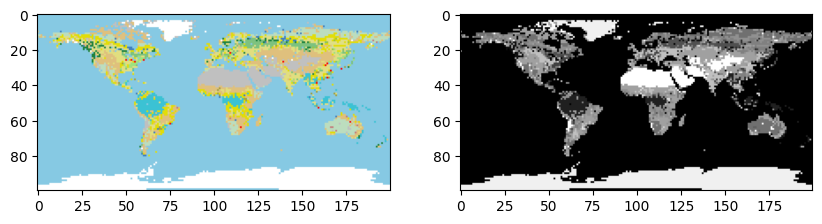

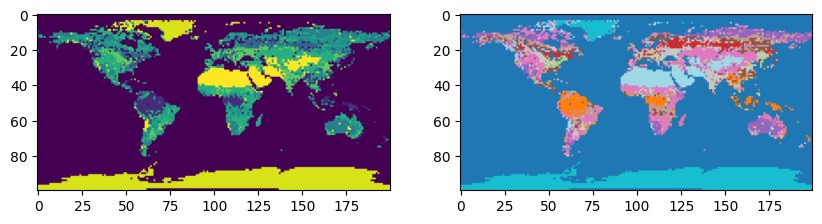

In [13]:
colors = [
    # Use an explicit mapping of values and colors
    Colorizer.palette(
        color_mapping={
            0.0: [134, 201, 227, 255],
            1.0: [30, 129, 62, 255],
            2.0: [59, 194, 212, 255],
            3.0: [157, 194, 63, 255],
            4.0: [159, 225, 127, 255],
            5.0: [125, 194, 127, 255],
            6.0: [195, 127, 126, 255],
            7.0: [188, 221, 190, 255],
            8.0: [224, 223, 133, 255],
            9.0: [226, 221, 7, 255],
            10.0: [223, 192, 125, 255],
            11.0: [66, 128, 189, 255],
            12.0: [225, 222, 127, 255],
            13.0: [253, 2, 0, 255],
            14.0: [162, 159, 66, 255],
            15.0: [255, 255, 255, 255],
            16.0: [192, 192, 192, 255],
        }
    ),
    # only pass the values you want to be colorized, defaults to a gray scale
    Colorizer.palette_with_colormap(values=np.arange(0.0, 17.0).tolist(), color_map="gray"),
]

plot_geoengine_img(colors)

colors = [
    # pass a continuous mpl colormap, the values will be discretized
    Colorizer.palette_with_colormap(
        values=np.arange(0.0, 17.0).tolist(), color_map="viridis"
    ),
    # pass a discrete mpl colormap. Keep the number of colors of the given map in mind while choosing!
    Colorizer.palette_with_colormap(
        values=np.arange(0.0, 17.0).tolist(), color_map="tab20"
    ),
]
plot_geoengine_img(colors)